Environment Setting

In [3]:
# Print every output from a specific cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Change to the current location (ref: https://webapps.stackexchange.com/questions/170886/copy-the-path-of-a-file-in-google-drive)
import os
os.chdir('/content/drive/MyDrive/1 - Study Hard/Softwares and Coding/Python_ML/Dataset')
!pwd

/content/drive/MyDrive/1 - Study Hard/Softwares and Coding/Python_ML/Dataset


# Data Loading and EDA

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
%matplotlib inline

In [7]:
ccfile="cc_info.csv"
txnfile="transactions.csv"

cc_df = pd.read_csv(ccfile)
txnfile_df = pd.read_csv(txnfile)

In [9]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB


In [8]:
txnfile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 11.2+ MB


In [12]:
cc_df.duplicated().sum()

0

In [13]:
txnfile_df.duplicated().sum()

0

No missing data, no duplicated data.

In [9]:
cc_df.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [10]:
txnfile_df.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [8]:
data = pd.merge(cc_df, txnfile_df, on = 'credit_card', how = 'left')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   city                       294588 non-null  object 
 2   state                      294588 non-null  object 
 3   zipcode                    294588 non-null  int64  
 4   credit_card_limit          294588 non-null  int64  
 5   date                       294588 non-null  object 
 6   transaction_dollar_amount  294588 non-null  float64
 7   Long                       294588 non-null  float64
 8   Lat                        294588 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 20.2+ MB


In [19]:
data.head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat
0,1280981422329509,Dallas,PA,18612,6000,2015-08-05 00:59:19,11.94,-75.964527,41.353578
1,1280981422329509,Dallas,PA,18612,6000,2015-10-29 18:23:04,5.76,-76.019703,41.311467
2,1280981422329509,Dallas,PA,18612,6000,2015-10-25 17:50:48,25.84,-76.043031,41.291053
3,1280981422329509,Dallas,PA,18612,6000,2015-09-05 17:39:43,68.89,-75.944299,41.327282
4,1280981422329509,Dallas,PA,18612,6000,2015-09-04 14:12:59,27.01,-75.997259,41.352099


# Question1
Your boss wants to identify those users that in your dataset never went above the monthly credit card limit (calendar month). The goal of this is to automatically increase their limit. Can you send him the list of Ids?

In [20]:
data[['credit_card', 'credit_card_limit']].value_counts()
# total number of rows = 984, which is equal to the number of rows of cc_df. This means that for each credit_card number, the credit_card_limit is unique

credit_card       credit_card_limit
2239759218122779  20000                667
3015736744626726  10000                657
5059189477453448  42000                655
4569281393242605  16000                653
3824313030996787  12000                653
                                      ... 
4705966876787269  10000                  2
6400102930973570  8000                   2
2848482178783636  7000                   1
4954103748307036  4000                   1
4296246438604183  10000                  1
Name: count, Length: 984, dtype: int64

In [9]:
# Compute users monthly total transactions
data['yr_mon'] = data['date'].str.slice(0,7)
data['date'] = pd.to_datetime(data['date'])
tmp = data.groupby(['credit_card', 'yr_mon', 'credit_card_limit'], as_index = False)['transaction_dollar_amount'].sum()

In [36]:
data.head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,yr_mon
0,1280981422329509,Dallas,PA,18612,6000,2015-08-05 00:59:19,11.94,-75.964527,41.353578,2015-08
1,1280981422329509,Dallas,PA,18612,6000,2015-10-29 18:23:04,5.76,-76.019703,41.311467,2015-10
2,1280981422329509,Dallas,PA,18612,6000,2015-10-25 17:50:48,25.84,-76.043031,41.291053,2015-10
3,1280981422329509,Dallas,PA,18612,6000,2015-09-05 17:39:43,68.89,-75.944299,41.327282,2015-09
4,1280981422329509,Dallas,PA,18612,6000,2015-09-04 14:12:59,27.01,-75.997259,41.352099,2015-09


In [10]:
# The List of credit_card numbers who had exceeded their credit_card_limit at least once.
exclude_list = list(tmp[tmp['transaction_dollar_amount'] > tmp['credit_card_limit']]['credit_card'].drop_duplicates())
len(exclude_list)

122

In [54]:
# credit increase list
increase_list = data[~data['credit_card'].isin(exclude_list)]['credit_card'].drop_duplicates()
len(increase_list)

862

There are 862 users who are qualified for a credit increase.

# Question 2
On the other hand, she wants you to implement an algorithm that as soon as a user goes above her monthly limit, it triggers an alert so that the user can be notiﬁed about that.We assume here that at the beginning of the new month, user total money spent gets reset to zero (i.e. she pays the card fully at the end of each month). Build a function that for each day, returns a list of users who went above their credit card monthly limit on that day.

In [181]:
def above_limit_alarm(trans_data, date: str):
  '''
  For the given date(str), returns a list of users who went above their credit card monthly limit on that day.
  '''
  # Compute monthly transaction cumulate sum up to the given date
  data = trans_data.copy()  # rmb to make a deep copy
  date = pd.to_datetime(date)
  date_next = date + timedelta(days=1) # important! to include the date in selection, o.w. will only select up to date - 1
  data = data[data['date'] <= date_next]
  data['trans_cum_sum'] = data.sort_values(['credit_card', 'date']).groupby(['credit_card', 'yr_mon'], as_index = False)['transaction_dollar_amount'].cumsum()

  # Return the list of users who went above their credit card monthly limit **only on the given date**.
  # In other words, the uses whose spend was within their credit card monthly limit before the given date.
  exclude_list = list(data[(data['date'] < date) & (data['trans_cum_sum'] > data['credit_card_limit'])]['credit_card'].drop_duplicates())
  res = list(data[(data['date'] < date_next) & (data['trans_cum_sum'] > data['credit_card_limit'])
  & (~data['credit_card'].isin(exclude_list))]['credit_card'].drop_duplicates())

  return res


In [187]:
alarm_list = above_limit_alarm(data, '2015-08-20')
alarm_list

[7299183791723634, 5723635641134781, 8972201384562696]

In [193]:
# Validate
data[(data['credit_card'] == 7299183791723634) & (data['date'] >= '2015-08-19')].sort_values(['date']).head(10)
# the transaction amount went above the credit limit at '2015-08-20 23:41:16'. Result is valid.

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,yr_mon,trans_cum_sum
202457,7299183791723634,Washington,NH,3280,7000,2015-08-19 00:11:02,162.62,-72.017445,43.199922,2015-08,6636.41
202201,7299183791723634,Washington,NH,3280,7000,2015-08-20 01:34:16,130.01,-72.138359,43.227342,2015-08,6766.42
202231,7299183791723634,Washington,NH,3280,7000,2015-08-20 23:06:59,189.80,-72.115220,43.156906,2015-08,6956.22
202275,7299183791723634,Washington,NH,3280,7000,2015-08-20 23:41:16,118.27,-72.089479,43.112863,2015-08,7074.49
202180,7299183791723634,Washington,NH,3280,7000,2015-08-21 17:33:44,30.03,-72.174854,43.176228,2015-08,7104.52
202390,7299183791723634,Washington,NH,3280,7000,2015-08-22 03:08:39,133.74,-72.042171,43.155213,2015-08,7238.26
202291,7299183791723634,Washington,NH,3280,7000,2015-08-22 17:50:19,121.67,-72.098929,43.174294,2015-08,7359.93
202292,7299183791723634,Washington,NH,3280,7000,2015-08-22 17:50:20,139.48,-72.115275,43.246372,2015-08,7499.41
202293,7299183791723634,Washington,NH,3280,7000,2015-08-22 17:50:21,12.85,-72.029848,43.172278,2015-08,7512.26
202451,7299183791723634,Washington,NH,3280,7000,2015-08-22 18:53:34,90.33,-72.095089,43.172456,2015-08,7602.59


# Question 3
Finally, your boss is very concerned about frauds cause they are a huge cost for credit card companies. She wants you to implement an unsupervised algorithm that returns all transactions that seem unusual and are worth being investigated further.

The requirement is to implement an unsupervised algorithm to identify unusual transactions. i.e. the outliers. Below, we will implement the [robust random cut forest (RRCF)](https://github.com/kLabUM/rrcf) to complete the task.

In RRCF, the likelihood that a point is an outlier is measured by its [collusive displacement (CoDisp)](https://klabum.github.io/rrcf/anomaly-scoring.html): if including a new point significantly changes the model complexity (i.e. tree depth), then that point is more likely to be an outlier.

For RRCF
* scale matters

In [11]:
pip install rrcf

  Preparing metadata (setup.py) ... done
  Created wheel for rrcf: filename=rrcf-0.4.4-py3-none-any.whl size=10601 sha256=17500507b1a928535b15a8107faeb269c3370501b654f5032a05b992a0acb44b
  Stored in directory: /root/.cache/pip/wheels/51/d4/43/6ac8270752946ee2223022ce0ed0d66c9455d000e1facb53a6
Successfully built rrcf


In [10]:
import rrcf
from sklearn.preprocessing import MinMaxScaler

## Data Scaling

In [11]:
data['zipcode'] = data['zipcode'].astype('category')
data['city'] = data['city'].astype('category')
data['state'] = data['state'].astype('category')

In [12]:
data['timestamp'] = data['date']  # cardinality is too high
data['date'] = data['date'].dt.date # we will only focus on the date
exclude_vars = ['credit_card', 'trans_cum_sum', 'timestamp', 'yr_mon']
cat_vars = list(data.loc[:, ~data.columns.isin(exclude_vars)].select_dtypes(include = ['object','category']).columns)
num_vars = list(data.loc[:, ~data.columns.isin(exclude_vars)].select_dtypes(exclude = ['object','category']).columns)


In [14]:
data.head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,yr_mon,timestamp
0,1280981422329509,Dallas,PA,18612,6000,2015-08-05,11.94,-75.964527,41.353578,2015-08,2015-08-05 00:59:19
1,1280981422329509,Dallas,PA,18612,6000,2015-10-29,5.76,-76.019703,41.311467,2015-10,2015-10-29 18:23:04
2,1280981422329509,Dallas,PA,18612,6000,2015-10-25,25.84,-76.043031,41.291053,2015-10,2015-10-25 17:50:48
3,1280981422329509,Dallas,PA,18612,6000,2015-09-05,68.89,-75.944299,41.327282,2015-09,2015-09-05 17:39:43
4,1280981422329509,Dallas,PA,18612,6000,2015-09-04,27.01,-75.997259,41.352099,2015-09,2015-09-04 14:12:59


In [19]:
cat_vars
num_vars

['city', 'state', 'zipcode', 'date']

['credit_card_limit', 'transaction_dollar_amount', 'Long', 'Lat']

In [13]:
data_rrcf = data[cat_vars+num_vars].copy()

In [14]:
data_rrcf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   city                       294588 non-null  category
 1   state                      294588 non-null  category
 2   zipcode                    294588 non-null  category
 3   date                       294588 non-null  object  
 4   credit_card_limit          294588 non-null  int64   
 5   transaction_dollar_amount  294588 non-null  float64 
 6   Long                       294588 non-null  float64 
 7   Lat                        294588 non-null  float64 
dtypes: category(3), float64(3), int64(1), object(1)
memory usage: 12.1+ MB


### Categorical Variable One-hot Encodding

In [15]:
data_rrcf = pd.get_dummies(data_rrcf, dtype = int)

### Numerical Variables Normlization

In [16]:
mm = MinMaxScaler()
data_rrcf[num_vars] = mm.fit_transform(data_rrcf[num_vars])

In [22]:
data_rrcf.head()

,credit_card_limit,transaction_dollar_amount,Long,Lat,city_Akron,city_Albany,city_Alexandria,city_Amarillo,city_Arlington,city_Atlanta,...,date_2015-10-21,date_2015-10-22,date_2015-10-23,date_2015-10-24,date_2015-10-25,date_2015-10-26,date_2015-10-27,date_2015-10-28,date_2015-10-29,date_2015-10-30
0,0.075472,0.011930,0.287852,0.744417,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.075472,0.005750,0.287699,0.744130,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.075472,0.025831,0.287634,0.743991,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.075472,0.068883,0.287909,0.744238,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.075472,0.027001,0.287761,0.744407,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
data_rrcf.describe()

,credit_card_limit,transaction_dollar_amount,Long,Lat,city_Akron,city_Albany,city_Alexandria,city_Amarillo,city_Arlington,city_Atlanta,...,date_2015-10-21,date_2015-10-22,date_2015-10-23,date_2015-10-24,date_2015-10-25,date_2015-10-26,date_2015-10-27,date_2015-10-28,date_2015-10-29,date_2015-10-30
count,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000,...,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000,294588.000000
mean,0.254756,0.086001,0.287099,0.741587,0.004912,0.006395,0.001032,0.001915,0.004668,0.011141,...,0.009087,0.014067,0.016888,0.013392,0.007675,0.007101,0.008072,0.009376,0.013880,0.002274
std,0.150119,0.124661,0.056038,0.036688,0.069913,0.079715,0.032107,0.043714,0.068160,0.104961,...,0.094893,0.117768,0.128852,0.114945,0.087271,0.083970,0.089483,0.096374,0.116995,0.047636
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150943,0.029961,0.276038,0.738525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.245283,0.058462,0.295547,0.751558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.339623,0.100394,0.298630,0.756845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Fit RRCF

In [17]:
# Set tree parameters
tree_size = 1000

In [18]:
X = data_rrcf.to_numpy()  # RCTree requires input to be numpy array

In [16]:
X.shape

(294588, 379)

In [20]:
n = X.shape[0]
ind_mat = (n // tree_size, tree_size) # (number_of_trees, tree_size)
ixs = np.random.choice(n, size = ind_mat, replace=False)
forest = [rrcf.RCTree(X[ix], index_labels=ix) for ix in ixs]

In [21]:
# each tree has leaves_num = tree_size, each leave is a dic(sample_ind:leaf_ind)
# So, codisp = pd.Series({sample_ind:sample_codisp})
# avg_codisp = average codisp across trees for each sample

avg_codisp = pd.Series(0.0, index=np.arange(n))
index = np.zeros(n)

for tree in forest:
    codisp = pd.Series({leaf : tree.codisp(leaf) for leaf in tree.leaves})
    avg_codisp[codisp.index] += codisp
    np.add.at(index, codisp.index.values, 1)

avg_codisp /= index

In [22]:
avg_codisp[avg_codisp==0] # all the samples are selected by at least one tree

Series([], dtype: float64)

### Plotting the Results

<Figure size 2000x600 with 0 Axes>

<Axes: >

<Figure size 2000x600 with 0 Axes>

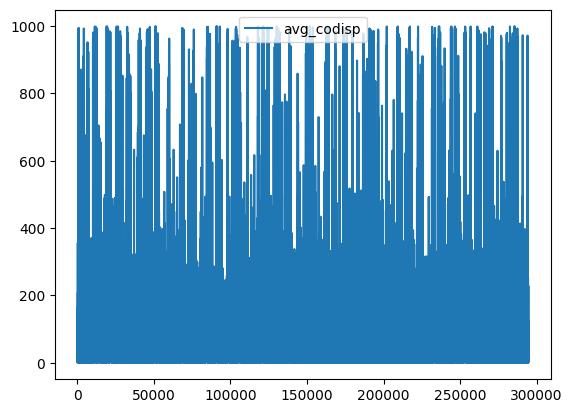

In [84]:
avg_codisp.plot()

<Axes: >

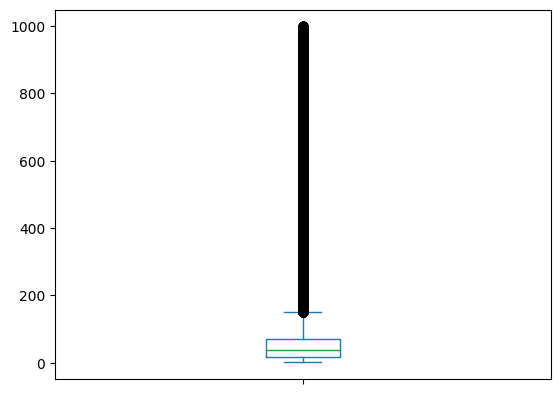

In [102]:
avg_codisp.plot.box() # highly right skewed

<Axes: ylabel='Frequency'>

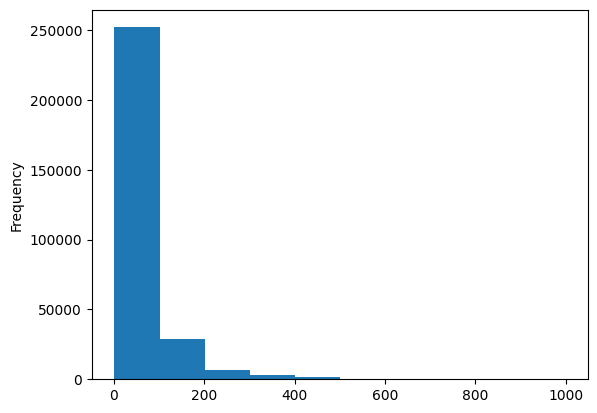

In [23]:
avg_codisp.plot.hist()

<Axes: ylabel='Frequency'>

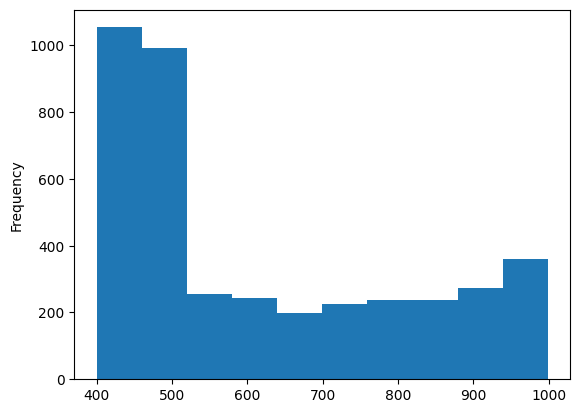

In [100]:
avg_codisp[avg_codisp>400].plot.hist()

It looks like we can set avg_codisp_df > 500 as outliers.

In [24]:
len(avg_codisp[avg_codisp>500])/len(avg_codisp)

0.006972449658506117

**0.7% of the data points are identified as outliers**

In [28]:
outlier_ind = avg_codisp[avg_codisp>500].index

In [29]:
data.iloc[outlier_ind,:].head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,yr_mon,timestamp
759,4749889059323202,Auburn,MA,1501,14000,2015-08-19,67.07,-71.796685,42.139123,2015-08,2015-08-19 20:49:09
768,4749889059323202,Auburn,MA,1501,14000,2015-08-18,70.35,-71.829198,42.246601,2015-08,2015-08-18 18:53:58
775,4749889059323202,Auburn,MA,1501,14000,2015-10-17,120.53,-71.897381,42.239690,2015-10,2015-10-17 19:55:33
788,4749889059323202,Auburn,MA,1501,14000,2015-08-06,98.37,-71.856611,42.247090,2015-08,2015-08-06 23:16:06
795,4749889059323202,Auburn,MA,1501,14000,2015-10-27,55.78,-71.891410,42.182921,2015-10,2015-10-27 17:34:42


In [30]:
data.iloc[outlier_ind,:]['credit_card'].drop_duplicates()

759       4749889059323202
1006      9591503562024072
2491      7482288151831611
4011      8536914250563809
4382      2440730617592819
                ...       
286665    9383760568579492
287290    4787957227319660
288590    3598888231646460
290653    2600687426901365
293939    8259854075192493
Name: credit_card, Length: 215, dtype: int64

**Totally 215 credit card numbers are identified as outliers**.

Further investigation can be conducted to find the common areas of these 215 credit card numbers.

## Future Work
* Can create features to help RRCF find suspecious transactions. Candidate features are % of credit card limit spend, transaction amount percentile rank among user's historical transactions, distance between user's (lat, long) and their median (lat, long),
* Can also apply other unsupervised outlier detection algorithms, such as Isolation Forest, One-class SVM, and K-means.
* Can also build a ML model to predict the transaction amount given the other features, and select the predictions with large errors as outliers(suspecious transactions). Similar model can also be built to predict transaction (lat, long).